In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
from volatility_skew_prediction.data_loader import download_data, create_futures_data

In [2]:
data = download_data()
print(f'données chargées : {data.shape}')


print(f"✅ Données chargées : {data.shape}")
print(f"\n📊 Colonnes disponibles :")
print(data.columns.tolist())
print(f"\n👀 Aperçu des lignes :")
data

données chargées : (547280, 33)
✅ Données chargées : (547280, 33)

📊 Colonnes disponibles :
['[QUOTE_UNIXTIME]', ' [QUOTE_READTIME]', ' [QUOTE_DATE]', ' [QUOTE_TIME_HOURS]', ' [UNDERLYING_LAST]', ' [EXPIRE_DATE]', ' [EXPIRE_UNIX]', ' [DTE]', ' [C_DELTA]', ' [C_GAMMA]', ' [C_VEGA]', ' [C_THETA]', ' [C_RHO]', ' [C_IV]', ' [C_VOLUME]', ' [C_LAST]', ' [C_SIZE]', ' [C_BID]', ' [C_ASK]', ' [STRIKE]', ' [P_BID]', ' [P_ASK]', ' [P_SIZE]', ' [P_LAST]', ' [P_DELTA]', ' [P_GAMMA]', ' [P_VEGA]', ' [P_THETA]', ' [P_RHO]', ' [P_IV]', ' [P_VOLUME]', ' [STRIKE_DISTANCE]', ' [STRIKE_DISTANCE_PCT]']

👀 Aperçu des lignes :


,[QUOTE_UNIXTIME],[QUOTE_READTIME],[QUOTE_DATE],[QUOTE_TIME_HOURS],[UNDERLYING_LAST],[EXPIRE_DATE],[EXPIRE_UNIX],[DTE],[C_DELTA],[C_GAMMA],...,[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],[P_VOLUME],[STRIKE_DISTANCE],[STRIKE_DISTANCE_PCT]
0,1701464400,2023-12-01 16:00,2023-12-01,16.0,4593.68,2023-12-01,1701464400,0.00,1.00000,0.00000,...,0.03,0.00000,0.0,0.00099,-0.02513,-0.00015,8.204890,1.000000,3393.7,0.739
1,1701464400,2023-12-01 16:00,2023-12-01,16.0,4593.68,2023-12-01,1701464400,0.00,1.00000,0.00000,...,0.00,-0.00001,0.0,0.00101,-0.02549,-0.00030,7.277540,,3193.7,0.695
2,1701464400,2023-12-01 16:00,2023-12-01,16.0,4593.68,2023-12-01,1701464400,0.00,1.00000,0.00000,...,0.00,0.00000,0.0,0.00095,-0.02498,-0.00034,6.481750,,2993.7,0.652
3,1701464400,2023-12-01 16:00,2023-12-01,16.0,4593.68,2023-12-01,1701464400,0.00,1.00000,0.00000,...,0.07,-0.00051,0.0,0.00052,-0.02494,-0.00016,5.776440,1.000000,2793.7,0.608
4,1701464400,2023-12-01 16:00,2023-12-01,16.0,4593.68,2023-12-01,1701464400,0.00,1.00000,0.00000,...,0.03,-0.00005,0.0,0.00083,-0.02497,-0.00044,5.150120,1.000000,2593.7,0.565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547275,1698782400,2023-10-31 16:00,2023-10-31,16.0,4193.47,2028-12-15,1860526800,1872.04,0.04061,0.00010,...,0.00,-1.00000,0.0,0.00000,0.00000,0.00000,,,4606.5,1.099
547276,1698782400,2023-10-31 16:00,2023-10-31,16.0,4193.47,2028-12-15,1860526800,1872.04,0.04755,0.00004,...,0.00,-1.00000,0.0,0.00000,0.00000,0.00000,,,5006.5,1.194
547277,1698782400,2023-10-31 16:00,2023-10-31,16.0,4193.47,2028-12-15,1860526800,1872.04,0.03981,0.00003,...,3741.43,-1.00000,0.0,0.00000,0.00000,0.00000,,0.000000,5406.5,1.289
547278,1698782400,2023-10-31 16:00,2023-10-31,16.0,4193.47,2028-12-15,1860526800,1872.04,0.02469,0.00005,...,0.00,-1.00000,0.0,0.00000,0.00000,0.00000,,,5806.5,1.385


In [3]:
from pathlib import Path
from volatility_skew_prediction.data_loader import download_data, create_futures_data

# Créer futures_data
futures_data = create_futures_data(data, min_dte=10, max_dte=180)

# Vérifier les dates disponibles
print(f"\n🔍 Dates disponibles dans futures_data :")
dates_disponibles = futures_data.index.get_level_values('Date').unique()
print(f"Première date : {dates_disponibles[0]}")
print(f"Dernière date : {dates_disponibles[-1]}")

futures_data



✅ futures_data créé : (1991, 4)
   📅 Dates uniques : 63
   📆 Expirations par date (moyenne) : 31.6

📊 Types de données :
futures_close     float64
days_to_expiry    float64
c_iv              float64
p_iv              float64
dtype: object

🔍 Dates disponibles dans futures_data :
Première date : 2023-10-02 00:00:00
Dernière date : 2023-12-29 00:00:00


futures_close  days_to_expiry      c_iv      p_iv
Date       Expiry                                                       
2023-10-02 2023-10-12        4288.24           10.00  0.319968  0.242158
           2023-10-13        4288.24           11.00  0.289233  0.239053
           2023-10-16        4288.24           14.00  0.270693  0.222238
           2023-10-17        4288.24           15.00  0.266505  0.222560
           2023-10-18        4288.24           16.00  0.261988  0.220749
...                              ...             ...       ...       ...
2023-12-29 2024-04-19        4772.17          111.96  0.223245  0.229967
           2024-04-30        4772.17          122.96  0.232256  0.219755
           2024-05-17        4772.17          139.96  0.232684  0.230837
           2024-05-31        4772.17          153.96  0.216483  0.209412
           2024-06-21        4772.17          174.96  0.239443  0.229157

[1991 rows x 4 columns]

In [4]:
from pathlib import Path
from volatility_skew_prediction.data_loader import download_data, create_futures_data, create_options_data

# Créer options_data
options_data = create_options_data(data, min_dte=10, max_dte=180)
options_data


✅ options_data créé : (458881, 5)
   📅 Dates uniques : 63
   📆 Expirations uniques : 92
   🎯 Strikes uniques : 464

📊 Distribution CE vs PE :
option_type
PE    258089
CE    200792
Name: count, dtype: int64


,date,expiry,strike_price,last,option_type
24,2023-12-01,2023-12-11,4000.0,555.13,CE
43,2023-12-01,2023-12-11,4200.0,310.50,CE
50,2023-12-01,2023-12-11,4260.0,298.58,CE
52,2023-12-01,2023-12-11,4275.0,287.52,CE
53,2023-12-01,2023-12-11,4280.0,217.34,CE
...,...,...,...,...,...
706114,2023-10-31,2024-04-19,5100.0,564.39,PE
706116,2023-10-31,2024-04-19,5300.0,753.02,PE
706119,2023-10-31,2024-04-19,5600.0,1034.67,PE
706122,2023-10-31,2024-04-19,6000.0,1629.93,PE


In [5]:
import warnings 
warnings.filterwarnings('ignore')
from volatility_skew_prediction.iv_calculator import find_strike_difference
 
 
strike_diff = find_strike_difference(options_data)

Mibian requires scipy to work properly
✅ Strike difference détecté : 5.0
📊 Exemples de strikes : [np.float64(100.0), np.float64(200.0), np.float64(300.0), np.float64(400.0), np.float64(500.0), np.float64(600.0), np.float64(700.0), np.float64(800.0), np.float64(900.0), np.float64(1000.0)]


In [6]:
import warnings 
warnings.filterwarnings('ignore')
from volatility_skew_prediction.iv_calculator import find_strike_difference , calculate_atm_strike_p

calculate_atm_strike_p(futures_data, strike_diff)


futures_close  days_to_expiry      c_iv      p_iv  \
Date       Expiry                                                          
2023-10-02 2023-10-12        4288.24           10.00  0.319968  0.242158   
           2023-10-13        4288.24           11.00  0.289233  0.239053   
           2023-10-16        4288.24           14.00  0.270693  0.222238   
           2023-10-17        4288.24           15.00  0.266505  0.222560   
           2023-10-18        4288.24           16.00  0.261988  0.220749   
...                              ...             ...       ...       ...   
2023-12-29 2024-04-19        4772.17          111.96  0.223245  0.229967   
           2024-04-30        4772.17          122.96  0.232256  0.219755   
           2024-05-17        4772.17          139.96  0.232684  0.230837   
           2024-05-31        4772.17          153.96  0.216483  0.209412   
           2024-06-21        4772.17          174.96  0.239443  0.229157   

                       atm_strike_price  otm_call_strike_price  \
Date       Expiry                                                
2023-10-02 2023-10-12            4290.0                 4300.0   
           2023-10-13            4290.0                 4300.0   
           2023-10-16            4290.0                 4300.0   
           2023-10-17            4290.0                 4300.0   
           2023-10-18            4290.0                 4300.0   
...                                 ...                    ...   
2023-12-29 2024-04-19            4770.0                 4780.0   
           2024-04-30            4770.0                 4780.0   
           2024-05-17            4770.0                 4780.0   
           2024-05-31            4770.0                 4780.0   
           2024-06-21            4770.0                 4780.0   

                       otm_put_strike_price  
Date       Expiry                            
2023-10-02 2023-10-12                4280.0  
           2023-10-13                4280.0  
           2023-10-16                4280.0  
           2023-10-17                4280.0  
           2023-10-18                4280.0  
...                                     ...  
2023-12-29 2024-04-19                4760.0  
           2024-04-30                4760.0  
           2024-05-17                4760.0  
           2024-05-31                4760.0  
           2024-06-21                4760.0  

[1991 rows x 7 columns]

In [7]:
import warnings 
warnings.filterwarnings('ignore')
from volatility_skew_prediction.iv_calculator import find_strike_difference , calculate_atm_strike_p
from volatility_skew_prediction.skew_calculator import calculate_ivs

futures_data = futures_data.reset_index()

print("✅ Types d'options normalisés:")
print(options_data['option_type'].value_counts())

skew_data = calculate_ivs(futures_data, options_data)

✅ Types d'options normalisés:
option_type
PE    258089
CE    200792
Name: count, dtype: int64
🔍 Colonnes détectées : date=Date, expiry=Expiry

✅ IV calculées : 1232/1991 lignes

📊 Aperçu :
        Date     Expiry  atm_iv  otm_call_iv  otm_put_iv  volatility_skew
0 2023-10-02 2023-10-12  45.065        37.02       43.40         0.141573
1 2023-10-02 2023-10-13  48.975        39.00       48.40         0.191935
2 2023-10-02 2023-10-16  52.510        50.15       54.18         0.076747
3 2023-10-02 2023-10-17  55.900        43.00       57.70         0.262970
4 2023-10-02 2023-10-18  51.635        53.77       55.70         0.037378
5 2023-10-02 2023-10-19  58.175        47.50       64.80         0.297379
6 2023-10-02 2023-10-20  60.485        53.96       47.92        -0.099859
7 2023-10-02 2023-10-23  67.005        68.53       58.58        -0.148496
8 2023-10-02 2023-10-24  80.745        77.30         NaN              NaN
9 2023-10-02 2023-10-25  74.050        55.83       61.67         0.0788

2025-11-22 22:32:26,759 - volatility_skew_prediction.skew_calculator - INFO - 📁 repertoires créés
2025-11-22 22:32:26,764 - volatility_skew_prediction.skew_calculator - INFO - ✅ Données sauvegardées : outputs/skew_data.csv


✅ Données nettoyées : 1013/1991 lignes (50.9%)


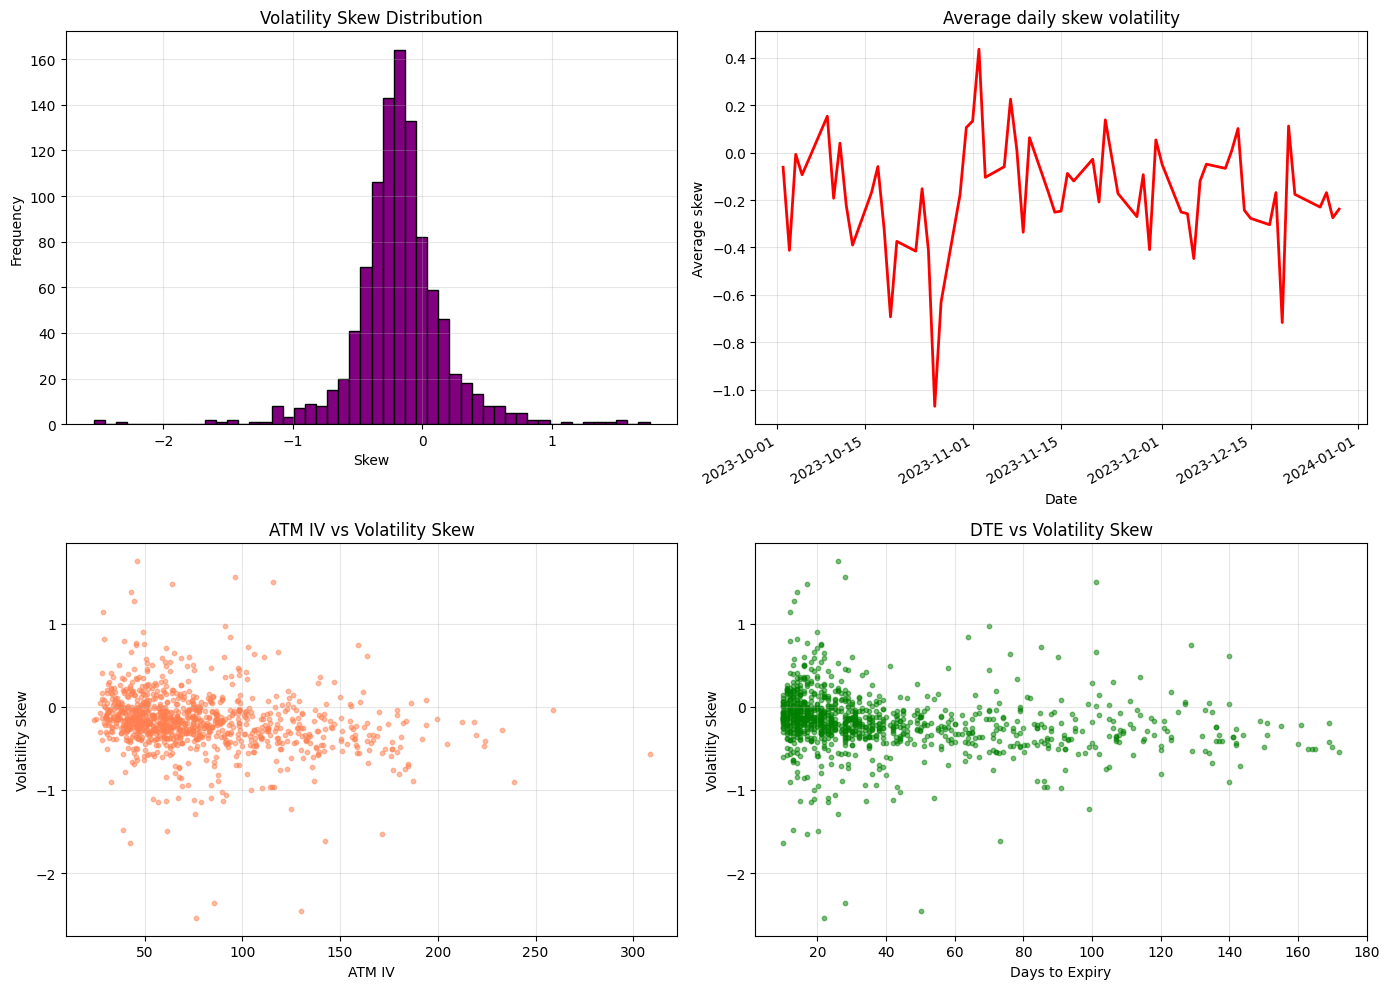

2025-11-22 22:32:27,164 - volatility_skew_prediction.skew_calculator - INFO - ✅ Visualisations sauvegardées : outputs/iv_skew_analysis.png



📊 ANALYSIS REPORT
Données nettoyées : 1013 lignes
Période : 2023-10-02 00:00:00 à 2023-12-29 00:00:00
average Skew : -0.1786
median Skew : -0.1854
Skew std : 0.3662
If the value of volatility skew is positive, it implies that the IV of OTM put is greater than the IV of OTM call and the price of the underlying is expected to fall.
If the value of volatility skew is negative, it implies that the IV of OTM call is greater than the IV of OTM put and the price of the underlying is expected to rise.


In [8]:
from volatility_skew_prediction.skew_calculator import calculate_ivs, save_analysis_results
import warnings 
warnings.filterwarnings('ignore')

clean_data = skew_data.dropna(subset=['atm_iv', 'otm_call_iv', 'otm_put_iv', 'volatility_skew'])
print(f"✅ Données nettoyées : {len(clean_data)}/{len(skew_data)} lignes ({len(clean_data)/len(skew_data)*100:.1f}%)")

save_analysis = save_analysis_results(clean_data)

In [9]:
import warnings 
warnings.filterwarnings('ignore')
from volatility_skew_prediction.iv_calculator import find_strike_difference , calculate_atm_strike_p
from volatility_skew_prediction.skew_calculator import calculate_ivs
from volatility_skew_prediction.strategy import generate_trading_signals
#from volatility_skew_prediction.strategy import clean_duplicate_dates, generate_trading_signals

futures_data = futures_data.reset_index()

# Test 1 : Seuils plus stricts (moins de trades, meilleure qualité)
df1 = generate_trading_signals(skew_data, use_percentile=True, 
                               long_pct=20, short_pct=80, target_dte=7)

# Test 2 : Encore plus strict
df2 = generate_trading_signals(skew_data, use_percentile=True, 
                               long_pct=15, short_pct=85, target_dte=7)

# Test 3 : DTE plus long (options plus liquides)
df3 = generate_trading_signals(skew_data, use_percentile=True, 
                               long_pct=30, short_pct=70, target_dte=14)

# Test DTE=21 (plus stable encore ?)
df4 = generate_trading_signals(skew_data, use_percentile=True, 
                               long_pct=30, short_pct=70, target_dte=21)






📊 Statistiques des signaux:
  Signaux Long  : 7
  Signaux Short : 8
  Sans position : 48
  DTE moyen utilisé : 10.7 jours

📊 Statistiques des signaux:
  Signaux Long  : 7
  Signaux Short : 6
  Sans position : 50
  DTE moyen utilisé : 10.7 jours

📊 Statistiques des signaux:
  Signaux Long  : 16
  Signaux Short : 11
  Sans position : 36
  DTE moyen utilisé : 14.0 jours

📊 Statistiques des signaux:
  Signaux Long  : 13
  Signaux Short : 14
  Sans position : 36
  DTE moyen utilisé : 21.0 jours


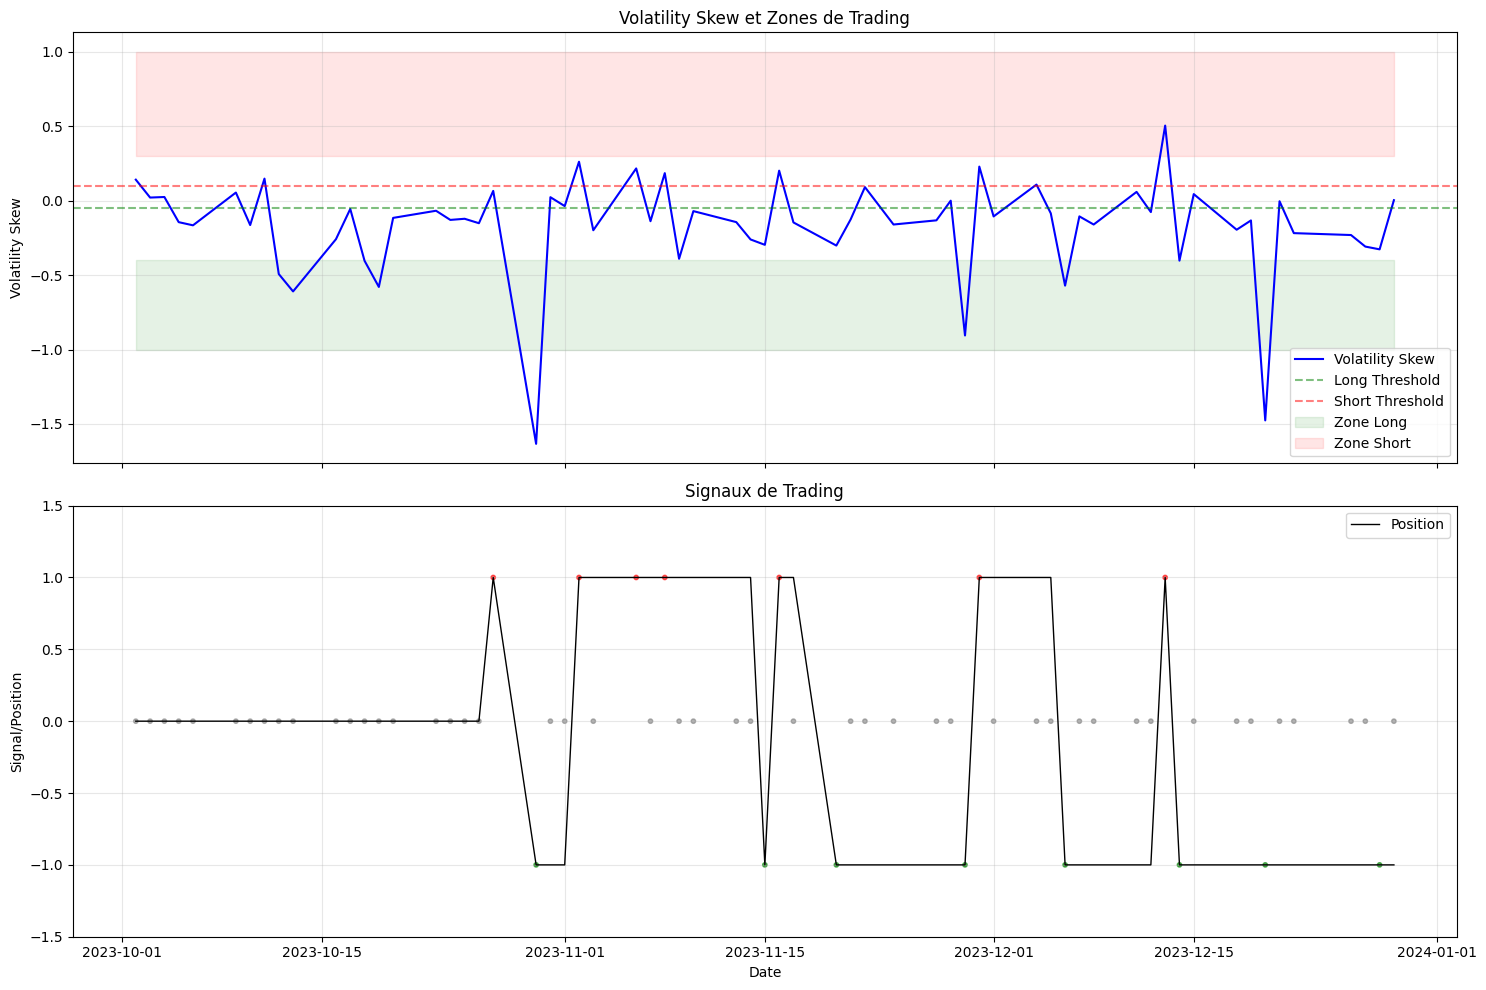

In [10]:
import warnings 
warnings.filterwarnings('ignore')
from volatility_skew_prediction.iv_calculator import find_strike_difference , calculate_atm_strike_p
from volatility_skew_prediction.skew_calculator import calculate_ivs
from volatility_skew_prediction.strategy import generate_trading_signals, plot_signals_and_skew

futures_data = futures_data.reset_index()
df = df1

fig = plot_signals_and_skew(df, figsize=(15, 10))

2025-11-22 22:32:27,522 - volatility_skew_prediction.perf_metrics - INFO - 💰 Coûts appliqués : 0.032% par trade
2025-11-22 22:32:27,523 - volatility_skew_prediction.perf_metrics - INFO - Sharpe Ratio: 3.4666
2025-11-22 22:32:27,524 - volatility_skew_prediction.perf_metrics - INFO - Maximum Drawdown: -1.68%



📊 RÉSULTATS DE PERFORMANCE
📈 Strategy Total Return :       2.70%
📊 Market Total Return   :      11.29%
🎯 Alpha                 :      -8.59%
⚡ Sharpe Ratio          :     3.4666
📉 Max Drawdown          :      -1.68%
📊 Nombre de trades      :         15


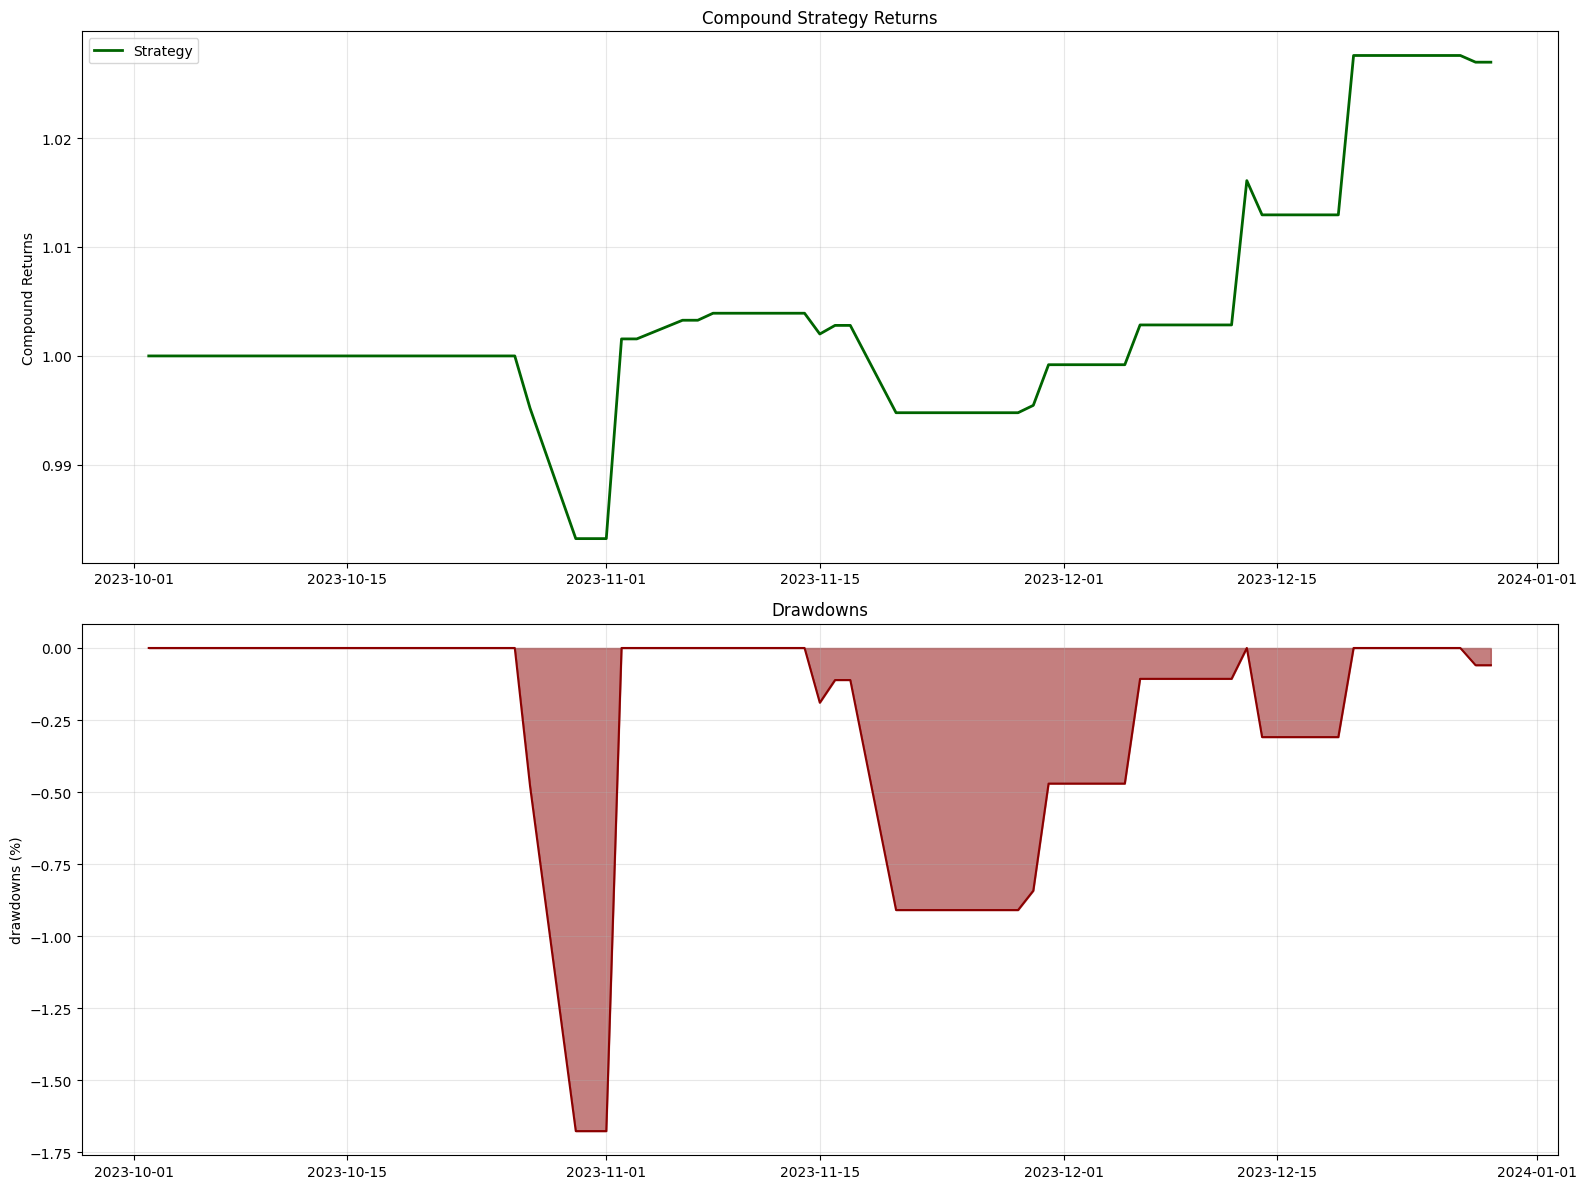

In [11]:
import warnings 
warnings.filterwarnings('ignore')
from volatility_skew_prediction.iv_calculator import find_strike_difference , calculate_atm_strike_p
from volatility_skew_prediction.skew_calculator import calculate_ivs
from volatility_skew_prediction.strategy import generate_trading_signals, plot_signals_and_skew
from volatility_skew_prediction.perf_metrics import analyse_strat_perf


results = analyse_strat_perf(df, apply_costs=True)


Le rendement composé généré par la stratégie est d'environ 1.027 fois le capital initial. Cela signifie qu'un investissement de 1 dollar dans cette stratégie avec réinvestissement des profits aurait atteint environ 1.027 dollars sur la période testée.

Le Sharpe Ratio de la stratégie s'établit à 3.47, ce qui signifie que pour gagner 3.47 dollars, nous risquons 1 dollar. Généralement, un Sharpe Ratio supérieur à 1 indique une stratégie performante ; un ratio de 3.47 est exceptionnel et témoigne d'une excellente gestion du risque.

Le maximum drawdown s'élève à -1.68%. Cela signifie que nous pouvons nous attendre à une perte maximale d'environ 1.68% lorsque nous tradons avec cette stratégie 